In [39]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt

0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


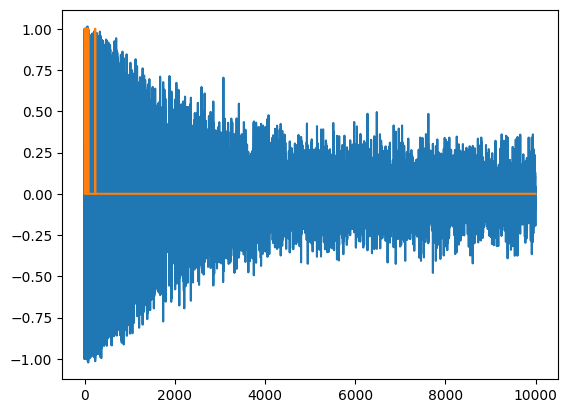

In [ ]:
# Define channels
h1 = np.array([0.2194, 1.0, 0.2194])
h2 = np.array([0.2798, 1.0, 0.2798])
h3 = np.array([0.3365, 1.0, 0.3365])
num_pre = 1
num_post = 1

# Generate gaussian distribution noise v
def generate_random_variable(mean,std,n):
    output = []
    for i in range(0,n):
        output.append(random.gauss(mean,std))
    return np.array(output)

# Generate input sequence a
def generate_random_input(n):
    return np.array(random.choices([-1,1],k=n))

def channel_output(x,h):
    return np.convolve(x,h)

def run_experiment(N_samples,M_weights,h,mu):
    w = np.array([0 for i in range(0,M_weights)]) # initialize weights to zero
    # Generate channel output, u
    tx_data = generate_random_input(n=N_samples)
    x = channel_output(tx_data,h)
    # noise = generate_random_variable(mean=0,std=1,n=len(x))
    noise = generate_random_variable(mean=0,std=0.1,n=len(x))
    ch_out = x + noise
    e = []
    for i in range(0,len(ch_out)-len(w)):
        # Determine filter input vector u
        u = np.flip(ch_out[i:i+len(w)])
        # Apply adaptive filter
        y = np.dot(w,u)
        # Update weights using LMS
        desired = tx_data[i]
        error = desired - y
        e.append(error)
        w = w + mu * error * u
    e = np.array(e)
    return w, e

def estimate_mse(e_k,K,N):
    mse = np.array([0 for n in range(0,N)])
    for n in range(0,N):
        for k in range(0,K):
            print(e_k[k][n])
            mse[n] = mse[n] + e_k[k][n] * e_k[k][n]
    return mse

w,e = run_experiment(10000,3,h1,0.001)
plt.plot(e)
plt.plot(estimate_mse([e],1,10000-1))


In [ ]:
# Channel filter
N = 100 # number of samples
a = generate_random_input(n=N)
x = channel_output(a,h1)
v = generate_random_variable(mean=0,std=1,n=len(x))
u = x + v

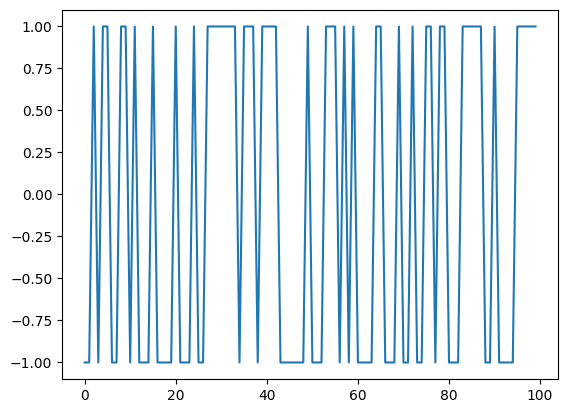

In [44]:
plt.plot(a)

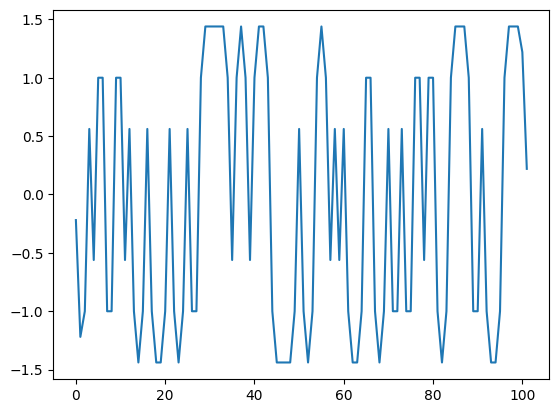

In [45]:
plt.plot(x)

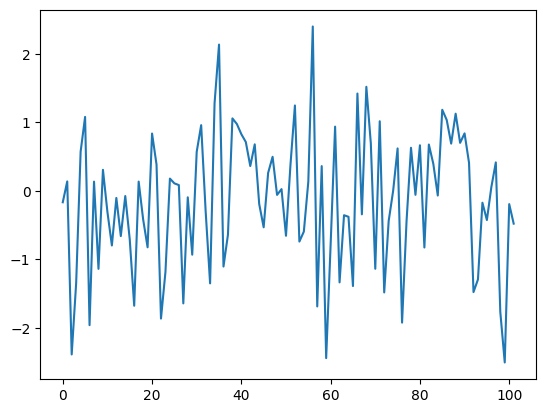

In [46]:
plt.plot(v)

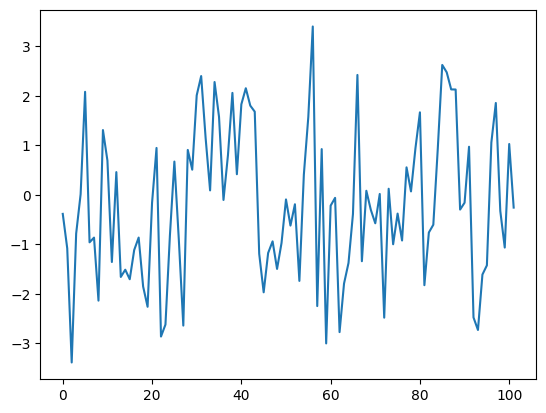

In [47]:
plt.plot(u)